In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
paciente='paciente1'

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

237

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

237

In [9]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

51

In [11]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

51

In [13]:
with open('dataset/generado/'+paciente+'/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

191

In [15]:
with open('dataset/generado/'+paciente+'/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

191

# Entrenamiento Vanilla LSTM con dropout

In [17]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [18]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_dropout_balanceado.h5')

Epoch 1/50
8/8 [==============================] - 4s 134ms/step - loss: 0.0374 - mae: 0.1420 - mse: 0.0374 - val_loss: 0.0203 - val_mae: 0.1269 - val_mse: 0.0203
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0329 - mae: 0.1465 - mse: 0.0329 - val_loss: 0.0162 - val_mae: 0.1123 - val_mse: 0.0162
Epoch 3/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0221 - mae: 0.1196 - mse: 0.0221 - val_loss: 0.0157 - val_mae: 0.1024 - val_mse: 0.0157
Epoch 4/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0161 - mae: 0.1023 - mse: 0.0161 - val_loss: 0.0130 - val_mae: 0.0948 - val_mse: 0.0130
Epoch 5/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0186 - mae: 0.1115 - mse: 0.0186 - val_loss: 0.0115 - val_mae: 0.0871 - val_mse: 0.0115
Epoch 6/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0149 - mae: 0.0947 - mse: 0.0149 - val_loss: 0.0132 - val_mae: 0.0847 - val_mse: 0.0132
Epoch 7/50
8/8 [=================

6/6 [==============================] - 0s 8ms/step - loss: 0.0080 - mae: 0.0705 - mse: 0.0080
test loss, test acc: [0.007979605346918106, 0.07046456634998322, 0.007979605346918106]


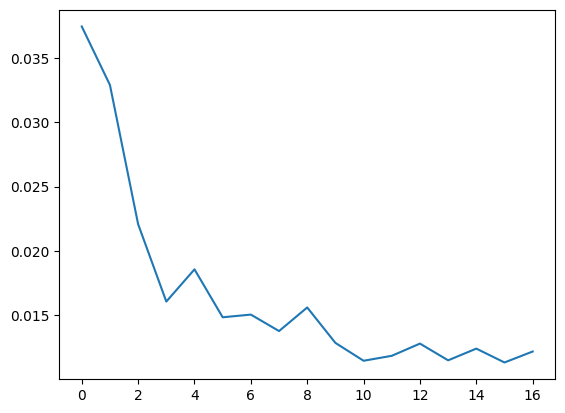

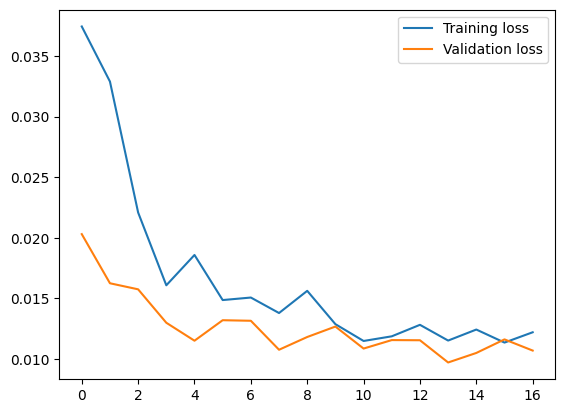

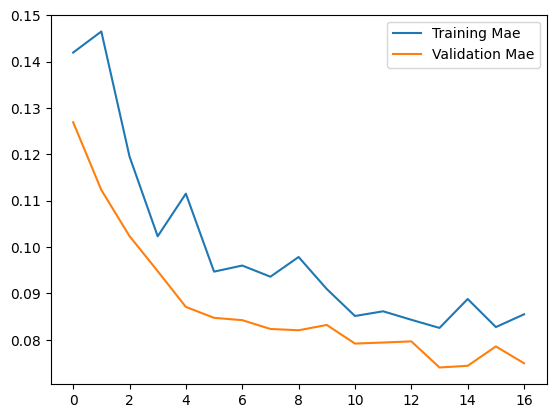

In [19]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 0s 8ms/step


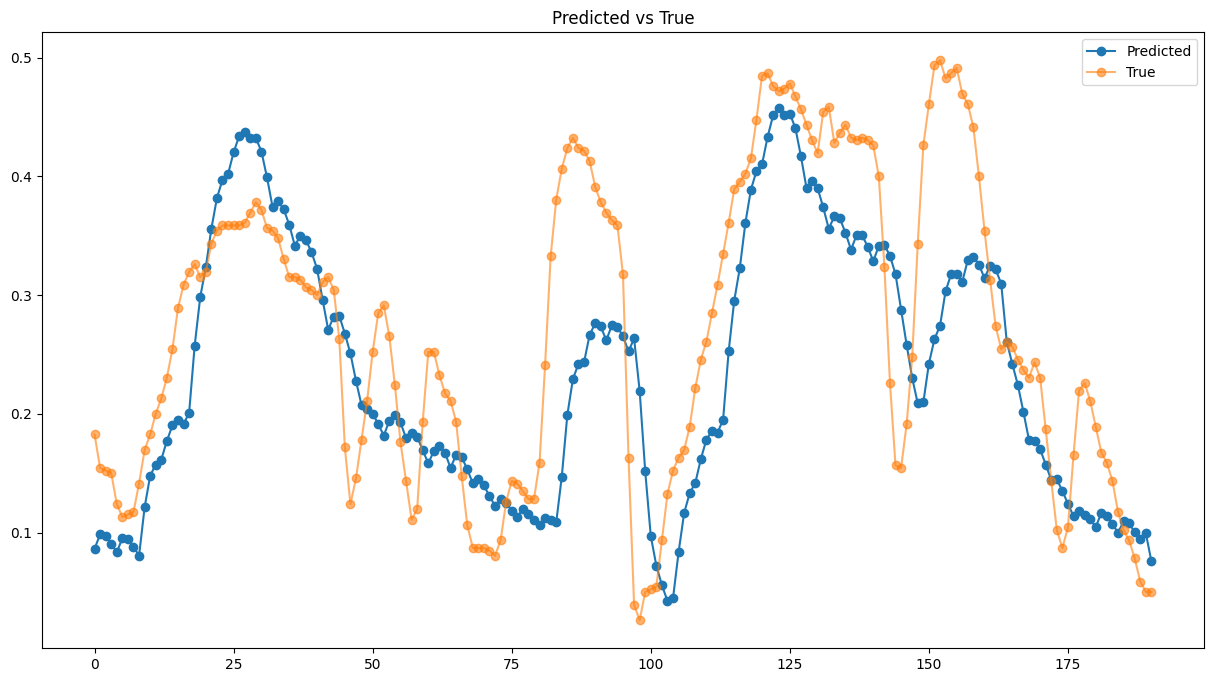

In [20]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [21]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.07046456837349509,
 'mse': 0.08932863885511336,
 'rmse': 0.007979605719707267}

# Entrenamiento Vanilla LSTM sin dropout

In [22]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [23]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_NO_dropout_balanceado.h5')

Epoch 1/50
8/8 [==============================] - 3s 94ms/step - loss: 0.0279 - mae: 0.1321 - mse: 0.0279 - val_loss: 0.0145 - val_mae: 0.1053 - val_mse: 0.0145
Epoch 2/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0179 - mae: 0.1149 - mse: 0.0179 - val_loss: 0.0122 - val_mae: 0.0963 - val_mse: 0.0122
Epoch 3/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0127 - mae: 0.0926 - mse: 0.0127 - val_loss: 0.0120 - val_mae: 0.0852 - val_mse: 0.0120
Epoch 4/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0095 - mae: 0.0777 - mse: 0.0095 - val_loss: 0.0089 - val_mae: 0.0754 - val_mse: 0.0089
Epoch 5/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0092 - mae: 0.0786 - mse: 0.0092 - val_loss: 0.0087 - val_mae: 0.0703 - val_mse: 0.0087
Epoch 6/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0082 - mae: 0.0699 - mse: 0.0082 - val_loss: 0.0092 - val_mae: 0.0693 - val_mse: 0.0092
Epoch 7/50
8/8 [==================

6/6 [==============================] - 0s 12ms/step - loss: 0.0049 - mae: 0.0532 - mse: 0.0049
test loss, test acc: [0.004927761387079954, 0.0532490611076355, 0.004927761387079954]


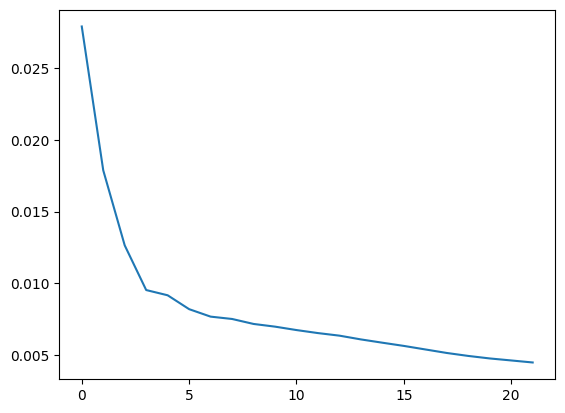

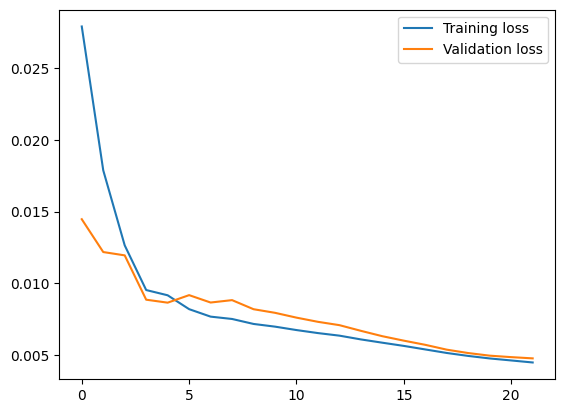

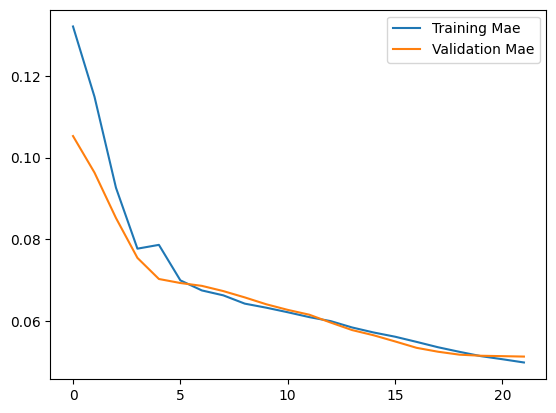

In [24]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 0s 9ms/step


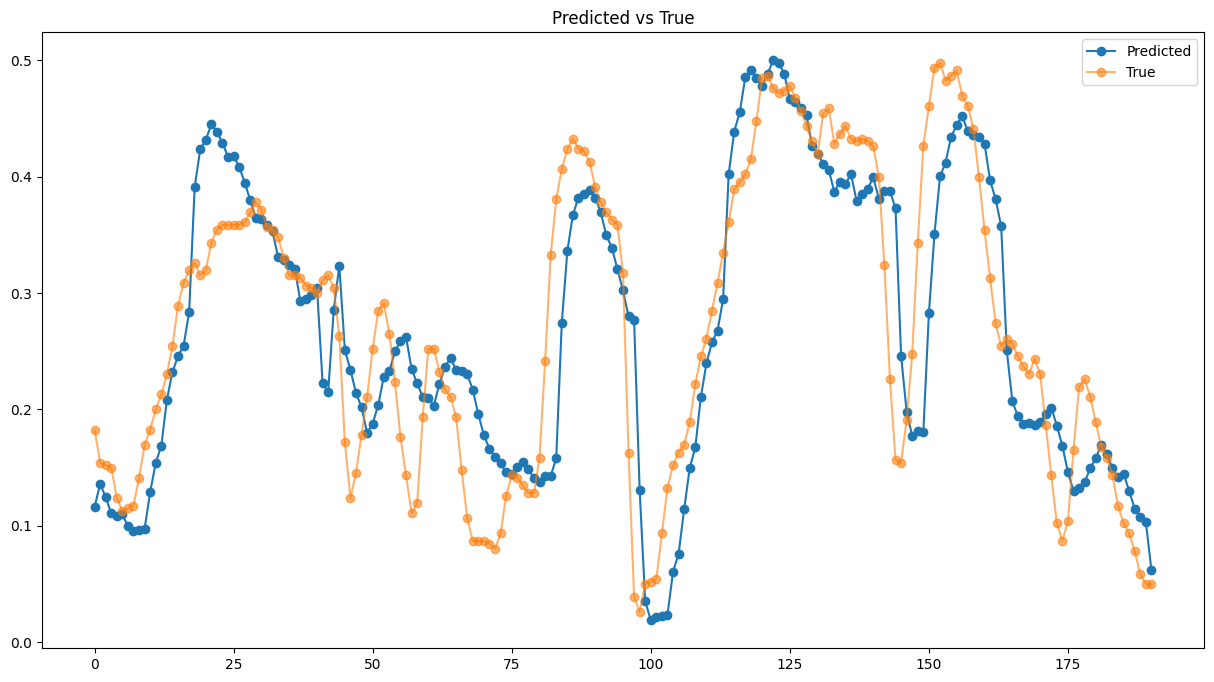

In [25]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [26]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.05324906616344719,
 'mse': 0.07019801632567285,
 'rmse': 0.0049277614960594315}

# Entrenamiento Stacked LSTM con dropout

In [27]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [28]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_dropout_balanceado.h5')

Epoch 1/50
8/8 [==============================] - 7s 142ms/step - loss: 0.0444 - mae: 0.1595 - mse: 0.0444 - val_loss: 0.0279 - val_mae: 0.1436 - val_mse: 0.0279
Epoch 2/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0301 - mae: 0.1475 - mse: 0.0301 - val_loss: 0.0254 - val_mae: 0.1426 - val_mse: 0.0254
Epoch 3/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0262 - mae: 0.1363 - mse: 0.0262 - val_loss: 0.0217 - val_mae: 0.1306 - val_mse: 0.0217
Epoch 4/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0239 - mae: 0.1317 - mse: 0.0239 - val_loss: 0.0203 - val_mae: 0.1230 - val_mse: 0.0203
Epoch 5/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0228 - mae: 0.1273 - mse: 0.0228 - val_loss: 0.0179 - val_mae: 0.1171 - val_mse: 0.0179
Epoch 6/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0207 - mae: 0.1192 - mse: 0.0207 - val_loss: 0.0168 - val_mae: 0.1084 - val_mse: 0.0168
Epoch 7/50
8/8 [=================

6/6 [==============================] - 0s 25ms/step - loss: 0.0082 - mae: 0.0719 - mse: 0.0082
test loss, test acc: [0.008204631507396698, 0.07188525050878525, 0.008204631507396698]


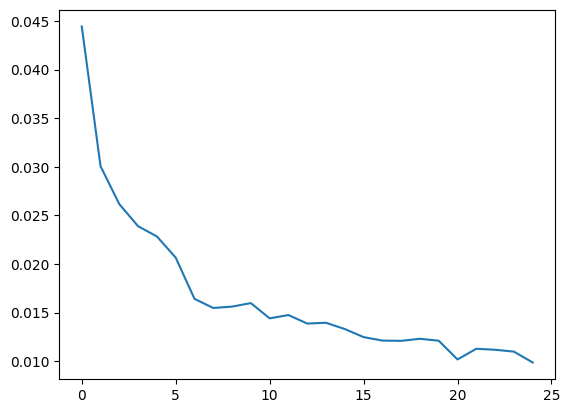

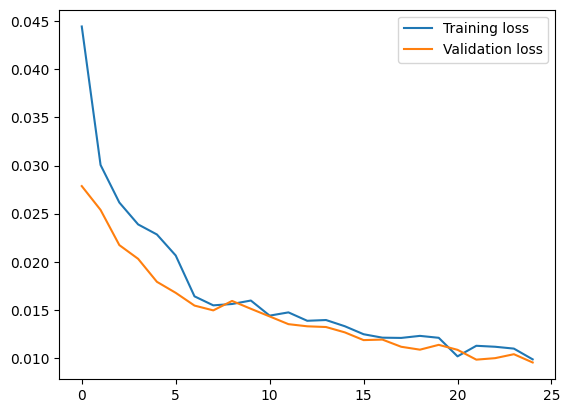

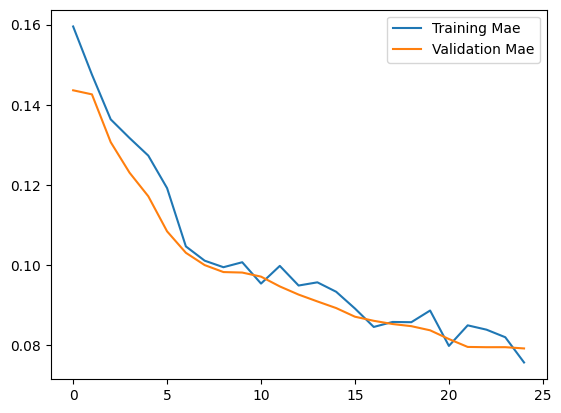

In [29]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 2s 21ms/step


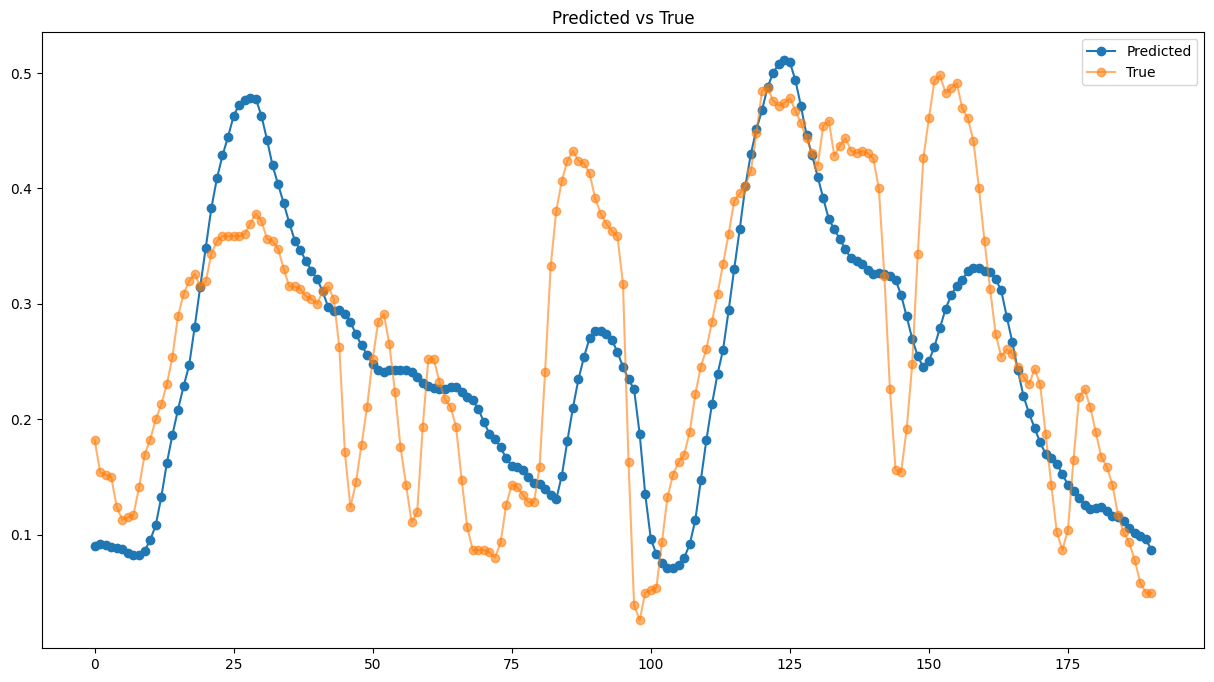

In [30]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [31]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.07188525380685014,
 'mse': 0.09057942173277984,
 'rmse': 0.008204631641444788}

# Entrenamiento Stacked LSTM sin dropout

In [32]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [33]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_NO_dropout_balanceado.h5')

Epoch 1/50
8/8 [==============================] - 6s 176ms/step - loss: 0.0486 - mae: 0.1617 - mse: 0.0486 - val_loss: 0.0298 - val_mae: 0.1426 - val_mse: 0.0298
Epoch 2/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0243 - mae: 0.1336 - mse: 0.0243 - val_loss: 0.0265 - val_mae: 0.1478 - val_mse: 0.0265
Epoch 3/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0249 - mae: 0.1379 - mse: 0.0249 - val_loss: 0.0186 - val_mae: 0.1256 - val_mse: 0.0186
Epoch 4/50
8/8 [==============================] - 0s 60ms/step - loss: 0.0165 - mae: 0.1097 - mse: 0.0165 - val_loss: 0.0156 - val_mae: 0.1121 - val_mse: 0.0156
Epoch 5/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0139 - mae: 0.0988 - mse: 0.0139 - val_loss: 0.0154 - val_mae: 0.1066 - val_mse: 0.0154
Epoch 6/50
8/8 [==============================] - 0s 61ms/step - loss: 0.0126 - mae: 0.0906 - mse: 0.0126 - val_loss: 0.0151 - val_mae: 0.1033 - val_mse: 0.0151
Epoch 7/50
8/8 [=================

6/6 [==============================] - 0s 27ms/step - loss: 0.0079 - mae: 0.0679 - mse: 0.0079
test loss, test acc: [0.007917314767837524, 0.06790980696678162, 0.007917314767837524]


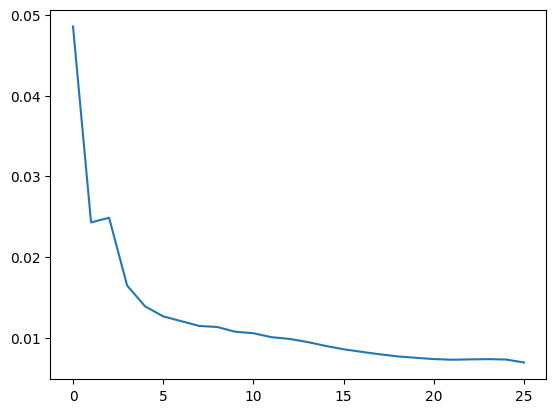

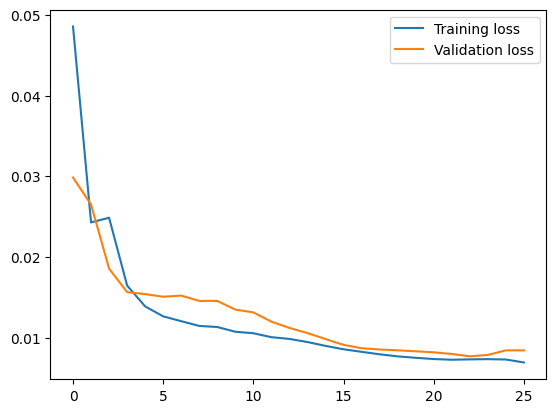

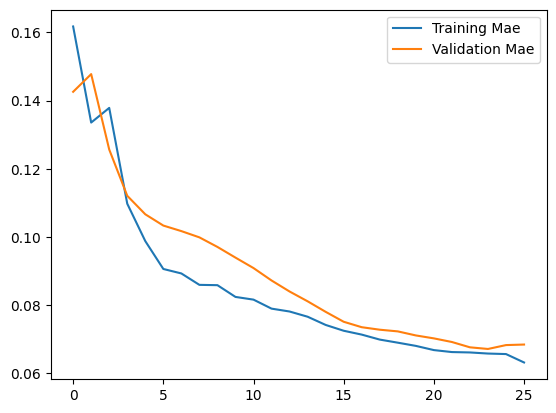

In [34]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 17ms/step


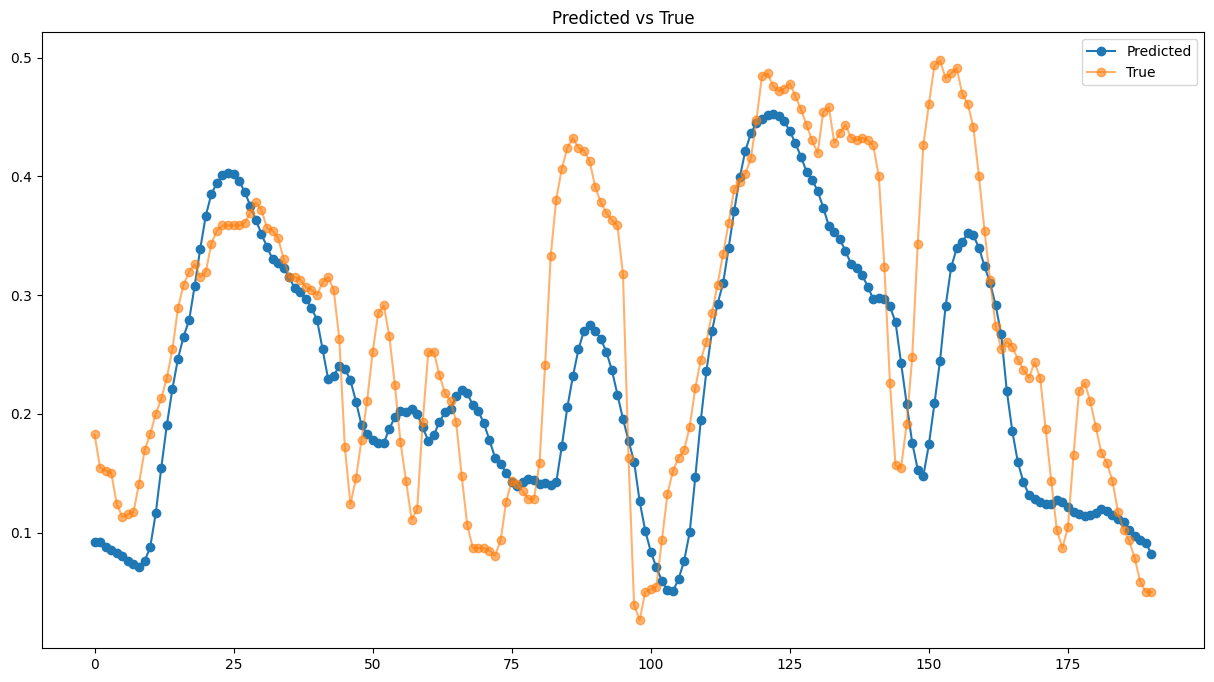

In [35]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [36]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.06790981419637186,
 'mse': 0.08897929400904382,
 'rmse': 0.007917314762347862}

# Entrenamiento Bidirectional LSTM con dropout

In [37]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [38]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_dropout_balanceado.h5')

Epoch 1/50
8/8 [==============================] - 6s 153ms/step - loss: 0.0462 - mae: 0.1677 - mse: 0.0462 - val_loss: 0.0244 - val_mae: 0.1404 - val_mse: 0.0244
Epoch 2/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0348 - mae: 0.1552 - mse: 0.0348 - val_loss: 0.0182 - val_mae: 0.1230 - val_mse: 0.0182
Epoch 3/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0279 - mae: 0.1366 - mse: 0.0279 - val_loss: 0.0182 - val_mae: 0.1121 - val_mse: 0.0182
Epoch 4/50
8/8 [==============================] - 0s 62ms/step - loss: 0.0193 - mae: 0.1114 - mse: 0.0193 - val_loss: 0.0153 - val_mae: 0.1077 - val_mse: 0.0153
Epoch 5/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0198 - mae: 0.1144 - mse: 0.0198 - val_loss: 0.0133 - val_mae: 0.1038 - val_mse: 0.0133
Epoch 6/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0178 - mae: 0.1072 - mse: 0.0178 - val_loss: 0.0126 - val_mae: 0.0983 - val_mse: 0.0126
Epoch 7/50
8/8 [=================

6/6 [==============================] - 0s 9ms/step - loss: 0.0076 - mae: 0.0662 - mse: 0.0076
test loss, test acc: [0.007556001655757427, 0.06618549674749374, 0.007556001655757427]


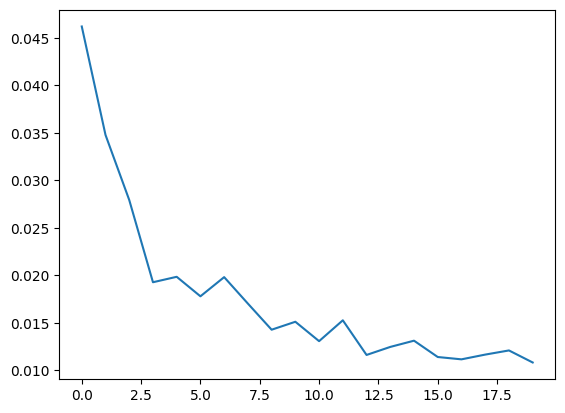

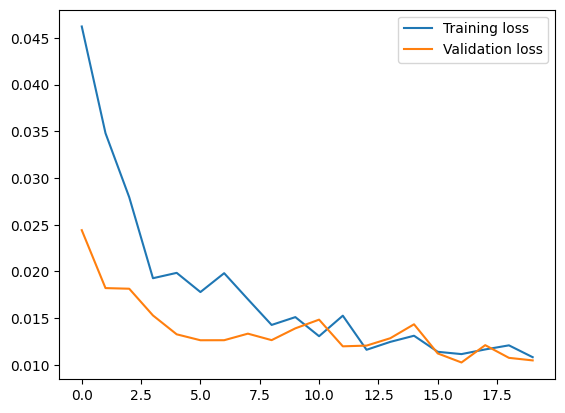

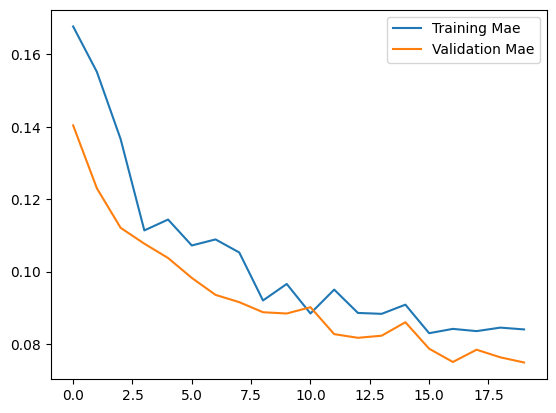

In [39]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 8ms/step


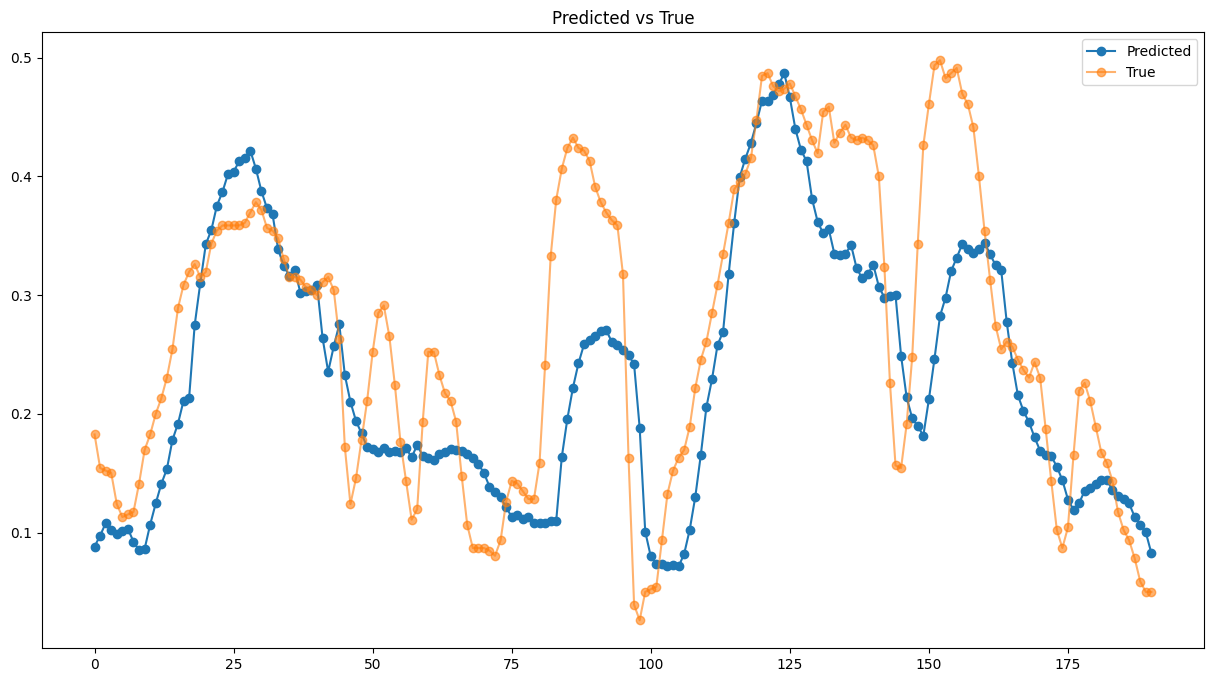

In [40]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [41]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.06618549809514486,
 'mse': 0.08692526707366854,
 'rmse': 0.007556002055828606}

# Entrenamiento Bidirectional LSTM sin dropout

In [42]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [43]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_NO_dropout_balanceado.h5')

Epoch 1/50
8/8 [==============================] - 8s 147ms/step - loss: 0.0374 - mae: 0.1489 - mse: 0.0374 - val_loss: 0.0248 - val_mae: 0.1418 - val_mse: 0.0248
Epoch 2/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0262 - mae: 0.1403 - mse: 0.0262 - val_loss: 0.0162 - val_mae: 0.1165 - val_mse: 0.0162
Epoch 3/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0164 - mae: 0.1053 - mse: 0.0164 - val_loss: 0.0160 - val_mae: 0.1034 - val_mse: 0.0160
Epoch 4/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0120 - mae: 0.0897 - mse: 0.0120 - val_loss: 0.0115 - val_mae: 0.0942 - val_mse: 0.0115
Epoch 5/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0115 - mae: 0.0884 - mse: 0.0115 - val_loss: 0.0110 - val_mae: 0.0851 - val_mse: 0.0110
Epoch 6/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0098 - mae: 0.0769 - mse: 0.0098 - val_loss: 0.0109 - val_mae: 0.0802 - val_mse: 0.0109
Epoch 7/50
8/8 [=================

6/6 [==============================] - 0s 15ms/step - loss: 0.0047 - mae: 0.0557 - mse: 0.0047
test loss, test acc: [0.0047366563230752945, 0.05573510378599167, 0.0047366563230752945]


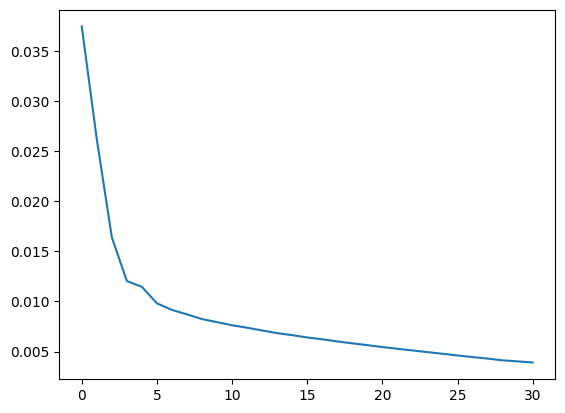

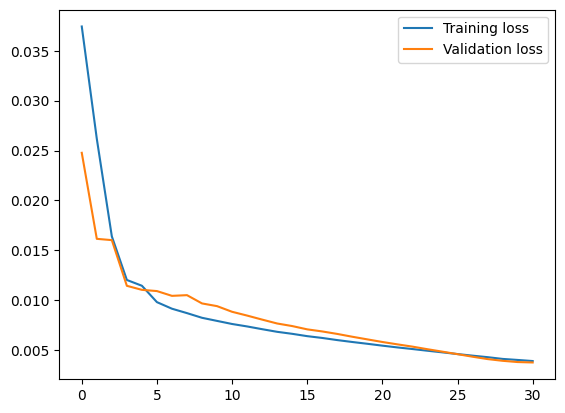

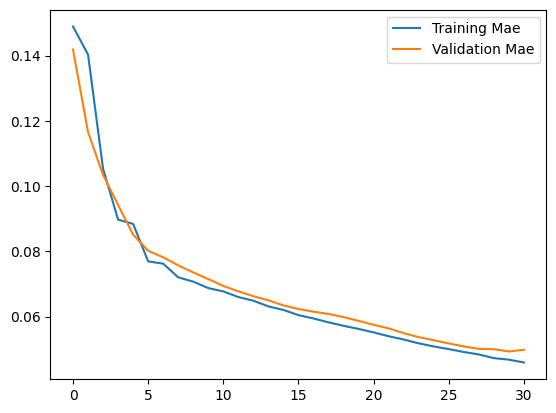

In [44]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 12ms/step


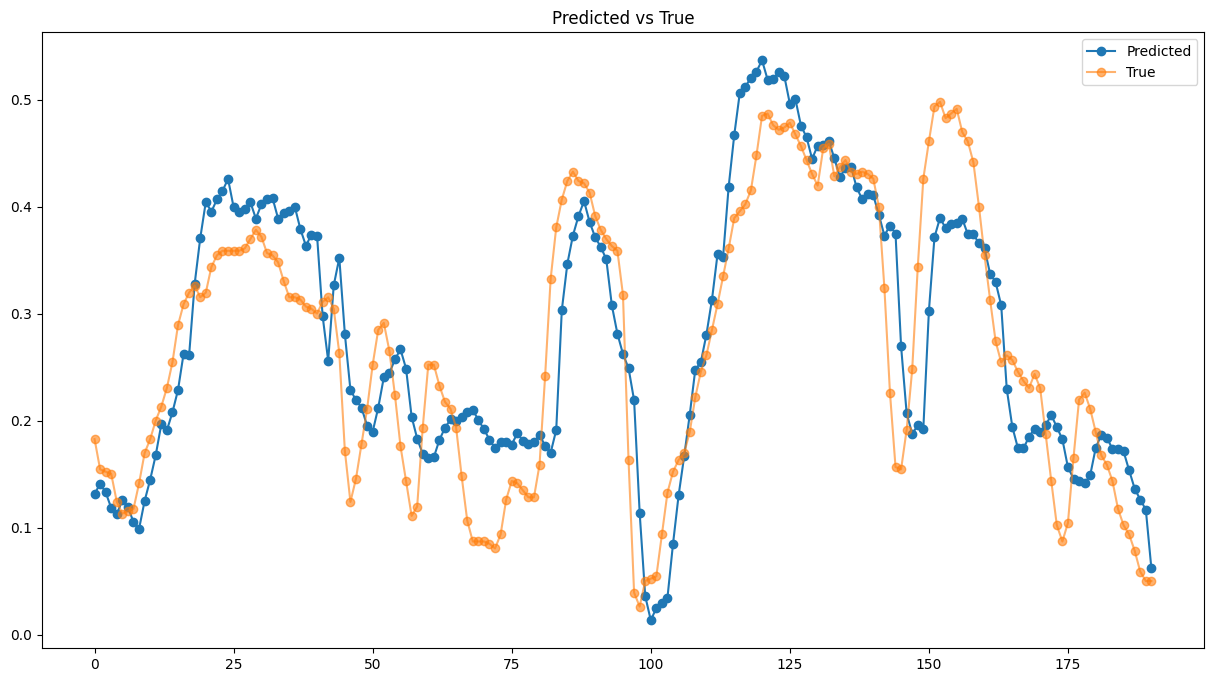

In [45]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [46]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.055735107101355874,
 'mse': 0.06882337100838147,
 'rmse': 0.004736656396957323}